# Análisis de Componentes Principales (PCA)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

x = 3*np.random.rand(200)
y = 20*x + 2*np.random.randn(200)

x = x.reshape(200,1)
y = y.reshape(200,1)

print(x)
print(y)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]
 [1.83555868]
 [0.41848158]
 [0.87643395]
 [1.09908553]
 [1.36820995]
 [2.35552788]
 [0.59902135]
 [1.54270332]
 [1.77724371]
 [0.13935124]
 [1.82263456]
 [0.51157237]
 [0.19515478]
 [2.84665661]
 [2.8968961 ]
 [2.42519204]
 [0.91384131]
 [0.29301634]
 [2.05269908]
 [1.32045748]
 [0.3661147 ]
 [1.48553073]
 [0.10316556]
 [2.72796121]
 [0.77633994]
 [1.98756685]
 [0.93513323]
 [1.56020406]
 [1.64013084]
 [0.55456337]
 [2.90875388]
 [2.32539847]
 [2.81849682]
 [2.68448205]
 [1.79369994]
 [2.76562271]
 [0.26547751]
 [0.58794859]
 [0.13568187]
 [0.97599099]
 [1.16603187]
 [0.8140471 ]
 [2.48621253]
 [1.07025998]
 [0.84280353]
 [1.62808825]
 [0.42277267]
 [2.40659094]
 [0.22365193]
 [2.96066081]
 [2.31673431]
 [0.59

In [3]:
xy = np.hstack([x, y])
print(xy.shape)

(200, 2)


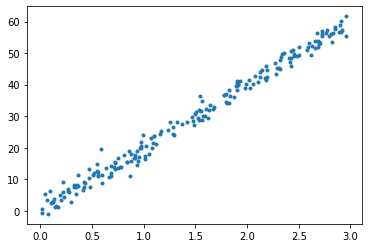

In [4]:
plt.plot(xy[:,0], xy[:,1], '.')
plt.show()

In [5]:
xy_centrado = xy - np.mean(xy, axis = 0)

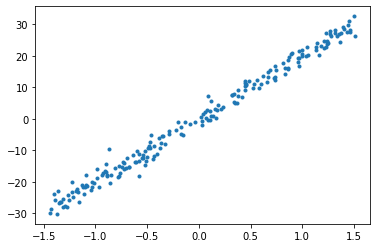

In [6]:
plt.plot(xy_centrado[:,0], xy_centrado[:,1], '.')
plt.show()

In [7]:
autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
print(autovectores)

[[-0.9987754  -0.04947417]
 [ 0.04947417 -0.9987754 ]]


In [8]:
%run "./funciones_auxiliares/graficarVectores.ipynb"

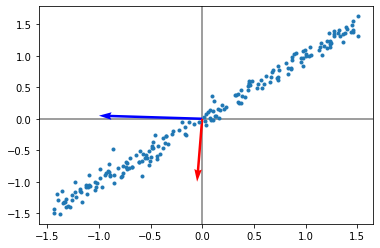

In [9]:
graficarVectores(autovectores.T, ['blue', 'red'])

plt.plot(xy_centrado[:, 0], xy_centrado[:, 1]/20, '.')
plt.show()

In [10]:
print(autovalores)

[1.85050946e+00 6.28759594e+04]


In [11]:
xy_nuevo = autovectores.T.dot(xy_centrado.T)

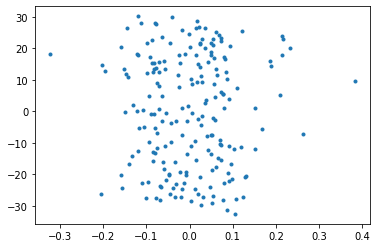

In [12]:
plt.plot(xy_nuevo[0, :], xy_nuevo[1, :], '.')
plt.show()

# Aplicando PCA a imagenes

In [13]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
im = imageio.imread("./imagenes/imagenes/s3/3.pgm")
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [15]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [16]:
im_original = im

im = im /255

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


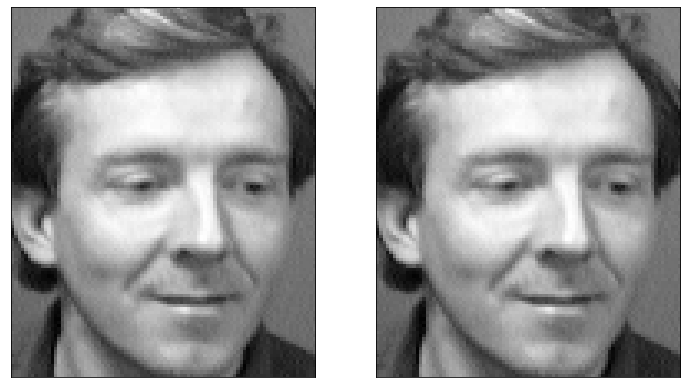

In [17]:
fix, ax = plt.subplots(1, 2, figsize=(12,12),
                       subplot_kw = {'xticks': [], 'yticks': []})
ax[0].imshow(im_original, cmap = 'gray')
ax[1].imshow(im, cmap = 'gray')

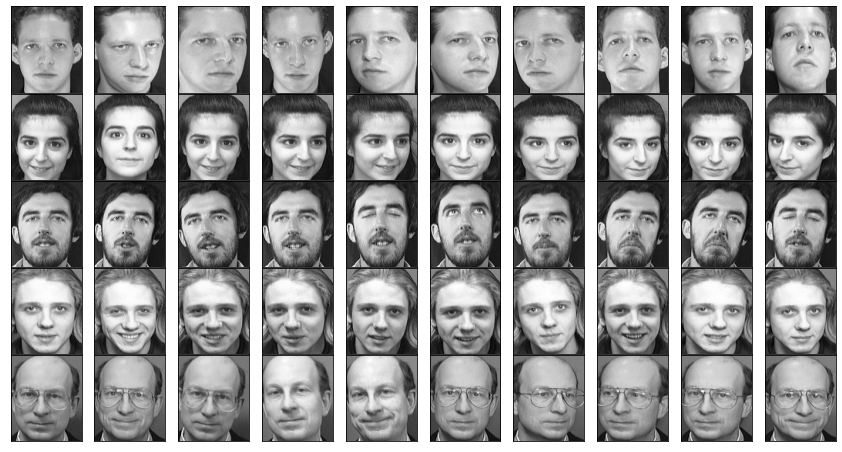

In [20]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('./imagenes/imagenes/*/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)
    
fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap='gray')

#### Tambien podemos descargar la imagenes de la libreria de sklearn

In [ ]:
import sklearn.datasets

In [ ]:
data = sklearn.datasets.fetch_olivetti_faces()

In [ ]:
imagen_1 = data.data[0].reshape(64, 64)
imagen_2 = data.data[1].reshape(64, 64)

In [ ]:
plt.imshow(data.data[5].reshape(64,64), cmap='gray')

#### Sigamos con el ejemplo

In [22]:
from sklearn.decomposition import PCA

In [23]:
caras_pca = PCA(n_components = 0.5)
caras_pca.fit(caras)

PCA(n_components=0.5)

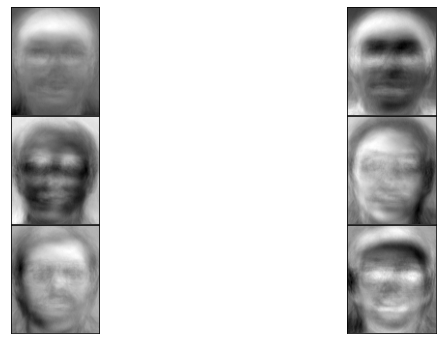

In [24]:
filas = 3
columnas = caras_pca.n_components_//filas

fig, axes = plt.subplots(filas, columnas, figsize=(12,6),
                       subplot_kw = {'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap='gray')

In [25]:
print(caras_pca.n_components_)

6


In [26]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

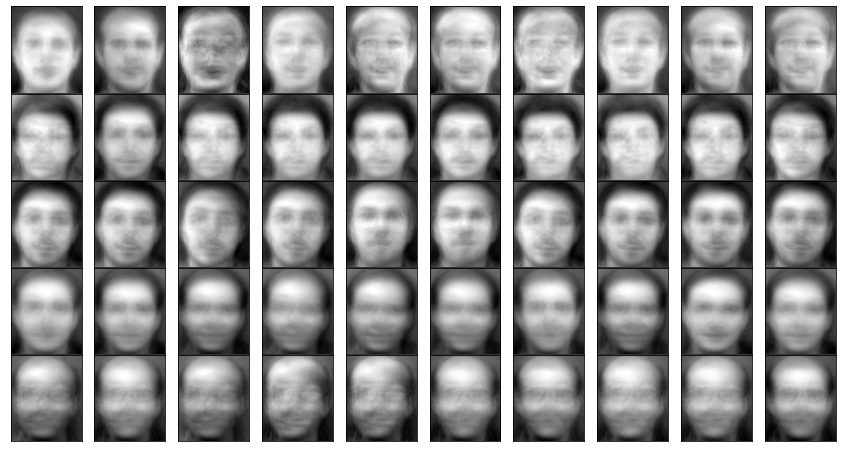

In [27]:
fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap='gray')

#### Probemos con el 80% de componentes

In [35]:
caras_pca = PCA(n_components = 0.8)
caras_pca.fit(caras)

PCA(n_components=0.8)

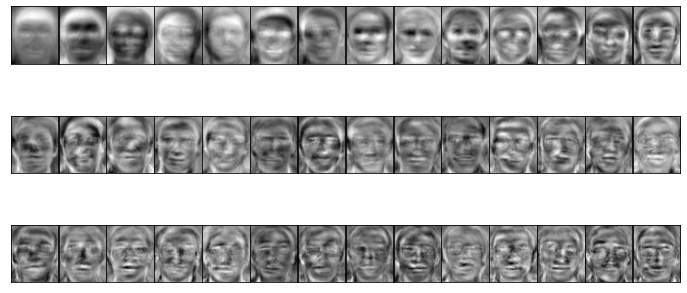

In [36]:
filas = 3
columnas = caras_pca.n_components_//filas

fig, axes = plt.subplots(filas, columnas, figsize=(12,6),
                       subplot_kw = {'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap='gray')

In [37]:
print(caras_pca.n_components_)

44


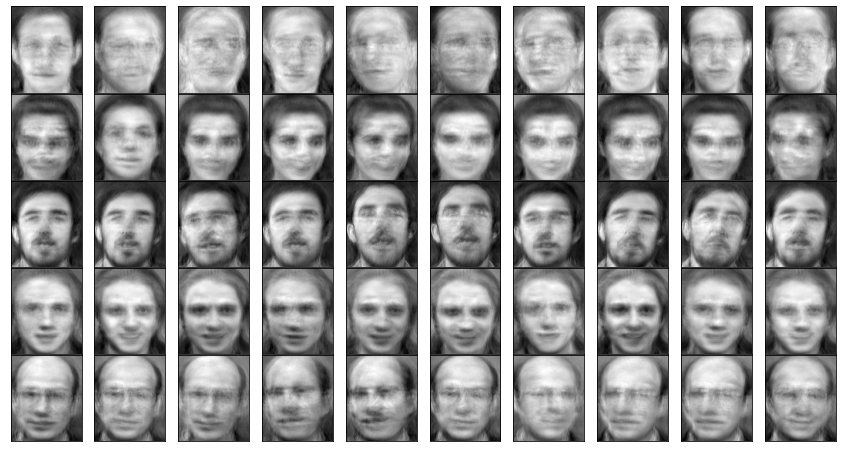

In [38]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap='gray')

Con solo 44 componentes podemos tener el 80% de la informacion, suficiente para poder diferenciar los diferentes ejemplos

#### Si quisiera el 99.999 % de la informacion, ¿Cuantos componentes necesitaria?

In [39]:
caras_pca = PCA(n_components = 0.999)
caras_pca.fit(caras)

PCA(n_components=0.999)

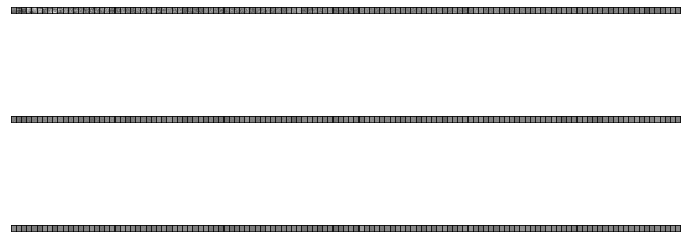

In [40]:
filas = 3
columnas = caras_pca.n_components_//filas

fig, axes = plt.subplots(filas, columnas, figsize=(12,6),
                       subplot_kw = {'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap='gray')

In [41]:
print(caras_pca.n_components_)

388


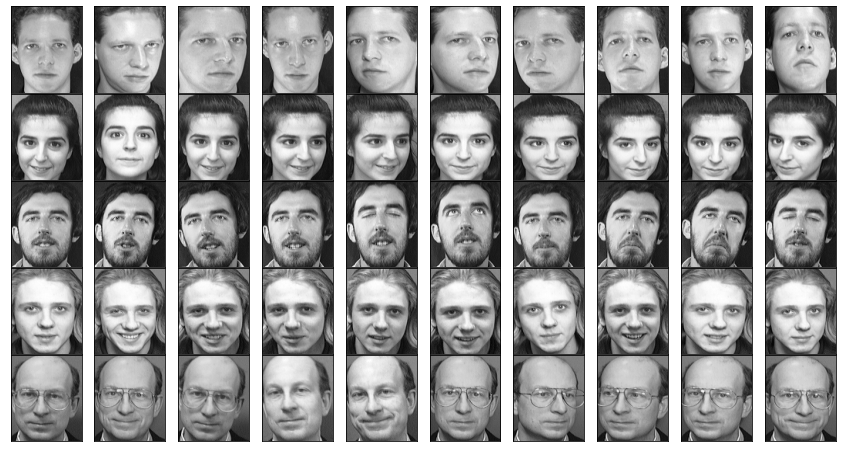

In [42]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap='gray')